In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import warnings
import datetime
import matplotlib.dates as mdates
import math
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
users_df = pd.read_csv('podatki/users.csv', sep = ',', dtype=object)
tweets_df = pd.read_csv('podatki/tweets.csv', sep = ',', dtype=object)

users_df['created_at'] = pd.to_datetime(users_df['created_at'])
tweets_df['created_str'] = pd.to_datetime(tweets_df['created_str'])

tweets_df.sort_values(by=['retweet_count'], ascending=False)

tweets_df.groupby(['user_key']).size().reset_index(name = 'count').sort_values(by = ['count'], ascending = False)[:10]

,user_key,count
21,ameliebaldwin,9269
175,hyddrox,6813
150,giselleevns,6652
326,patriotblake,4140
413,thefoundingson,3663
280,melvinsroberts,3346
293,mrclydepratt,3263
62,brianaregland,3261
252,leroylovesusa,3229
37,baobaeham,3215


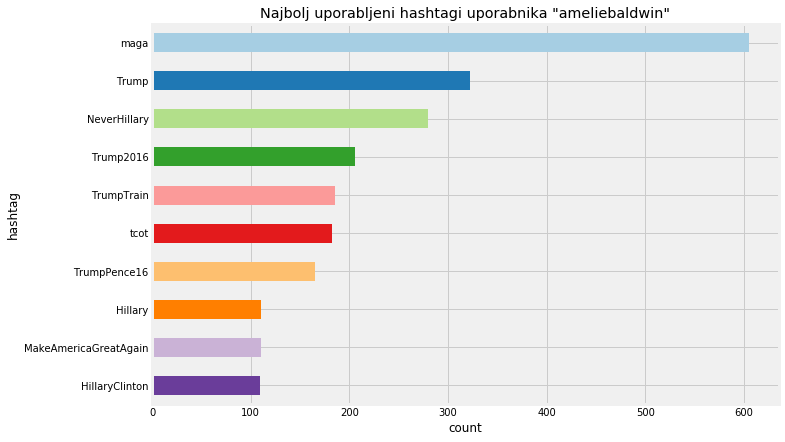

In [3]:
tweets_ameliebaldwin = tweets_df[tweets_df['user_key'] == "ameliebaldwin"] # ameliebaldwin

hashtags = np.array(tweets_ameliebaldwin['hashtags'].apply(ast.literal_eval))
top_hashtags = pd.Series(np.hstack(hashtags)).value_counts().nlargest(10)
top_hashtags.T.plot(kind='barh', figsize=(10, 7), color=plt.cm.Paired(np.arange(len(top_hashtags))))
plt.title('Najbolj uporabljeni hashtagi uporabnika "ameliebaldwin"')
plt.xlabel('count')
plt.ylabel('hashtag')
plt.gca().invert_yaxis()

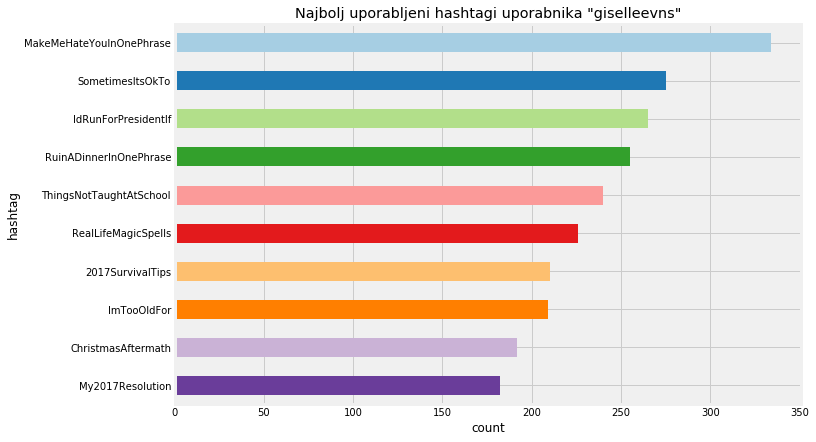

In [4]:
tweets_giselleevns = tweets_df[tweets_df['user_key'] == "giselleevns"] # giselleevns

hashtags = np.array(tweets_giselleevns['hashtags'].apply(ast.literal_eval))
top_hashtags = pd.Series(np.hstack(hashtags)).value_counts().nlargest(10)
top_hashtags.T.plot(kind='barh', figsize=(10, 7), color=plt.cm.Paired(np.arange(len(top_hashtags))))
plt.title('Najbolj uporabljeni hashtagi uporabnika "giselleevns"')
plt.xlabel('count')
plt.ylabel('hashtag')
plt.gca().invert_yaxis()

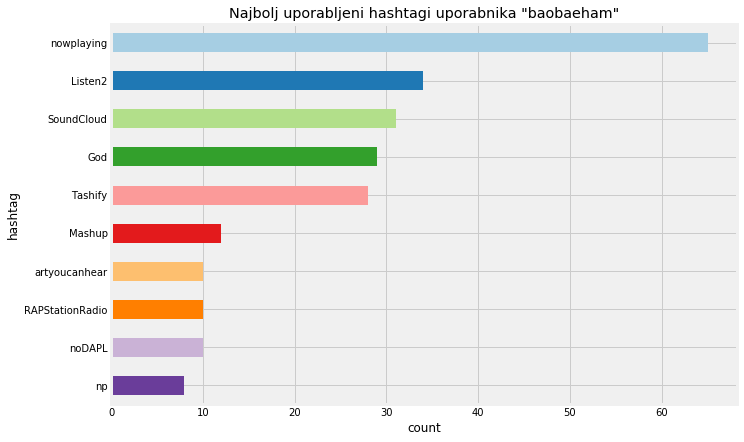

In [5]:
tweets_baobaeham = tweets_df[tweets_df['user_key'] == "baobaeham"] # baobaeham

hashtags = np.array(tweets_baobaeham['hashtags'].apply(ast.literal_eval))
top_hashtags = pd.Series(np.hstack(hashtags)).value_counts().nlargest(10)
top_hashtags.T.plot(kind='barh', figsize=(10, 7), color=plt.cm.Paired(np.arange(len(top_hashtags))))
plt.title('Najbolj uporabljeni hashtagi uporabnika "baobaeham"')
plt.xlabel('count')
plt.ylabel('hashtag')
plt.gca().invert_yaxis()

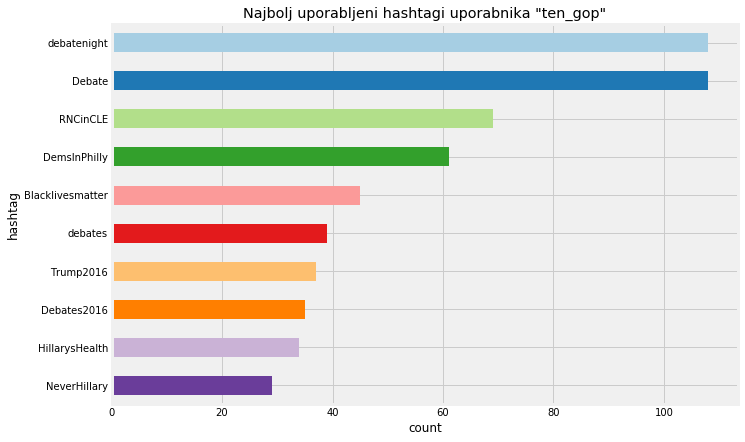

In [6]:
ten_gop = tweets_df[tweets_df['user_key'] == "ten_gop"] # ten_gop

hashtags = np.array(ten_gop['hashtags'].apply(ast.literal_eval))
top_hashtags = pd.Series(np.hstack(hashtags)).value_counts().nlargest(10)
top_hashtags.T.plot(kind='barh', figsize=(10, 7), color=plt.cm.Paired(np.arange(len(top_hashtags))))
plt.title('Najbolj uporabljeni hashtagi uporabnika "ten_gop"')
plt.xlabel('count')
plt.ylabel('hashtag')
plt.gca().invert_yaxis()

Text(0, 0.5, 'count')

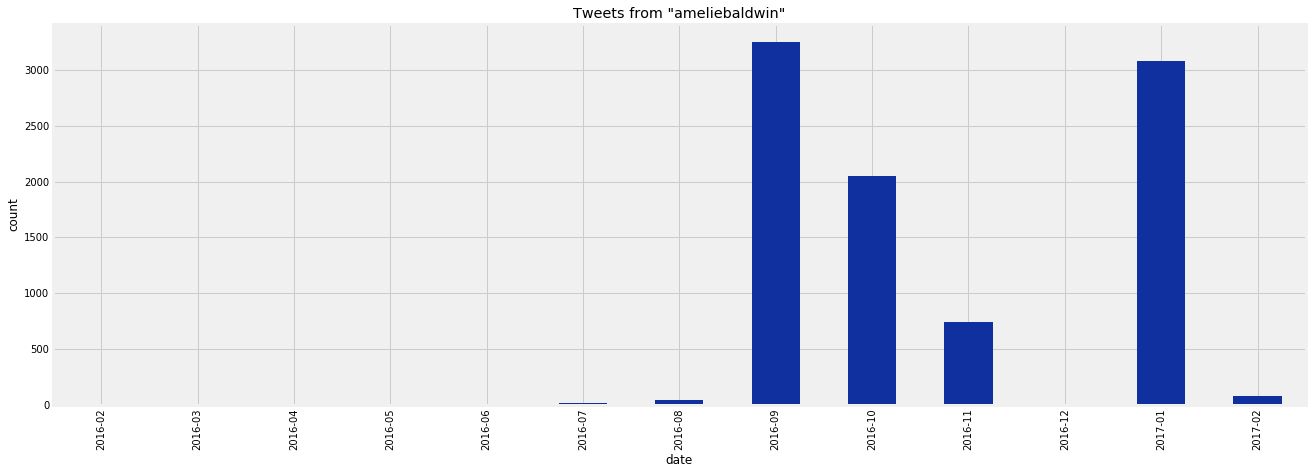

In [7]:
tweets_ameliebaldwin['month'] = tweets_ameliebaldwin['created_str'].dropna().dt.to_period('M')
months = tweets_ameliebaldwin['month'].dropna().sort_values()
index = pd.PeriodIndex(start=months.iloc[0], end=months.iloc[-1])
grouped_ameliebaldwin = tweets_ameliebaldwin.groupby('month')['created_at'].count().reindex(index)
grouped_ameliebaldwin.plot.bar(figsize=(20,7), linewidth=1, color="#1030A0")
plt.title('Tweets from "ameliebaldwin"')
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'count')

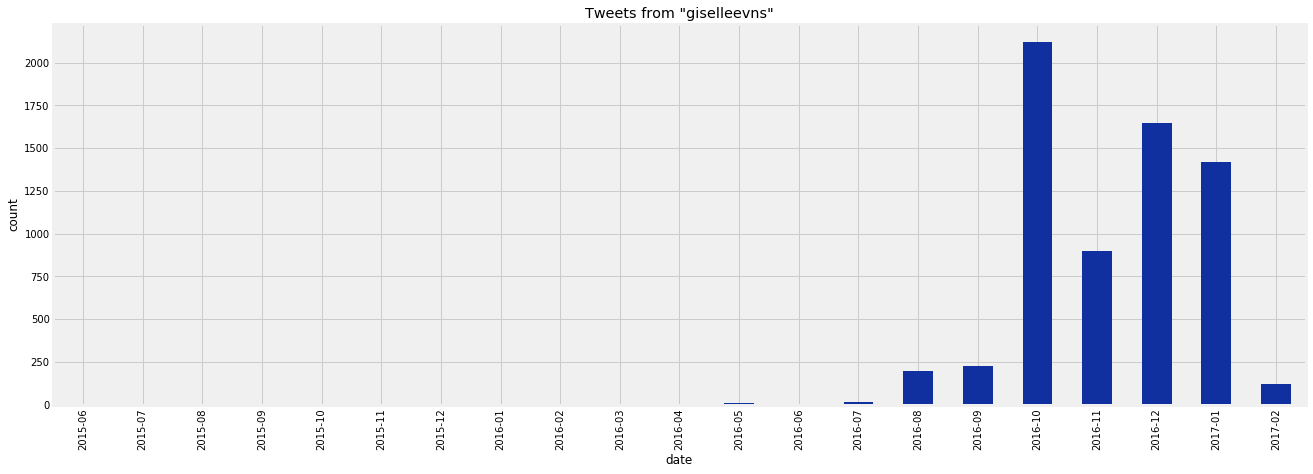

In [8]:
tweets_giselleevns['month'] = tweets_giselleevns['created_str'].dropna().dt.to_period('M')
months = tweets_giselleevns['month'].dropna().sort_values()
index = pd.PeriodIndex(start=months.iloc[0], end=months.iloc[-1])
grouped_giselleevns = tweets_giselleevns.groupby('month')['created_at'].count().reindex(index)
grouped_giselleevns.plot.bar(figsize=(20,7), linewidth=1, color="#1030A0")
plt.title('Tweets from "giselleevns"')
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'count')

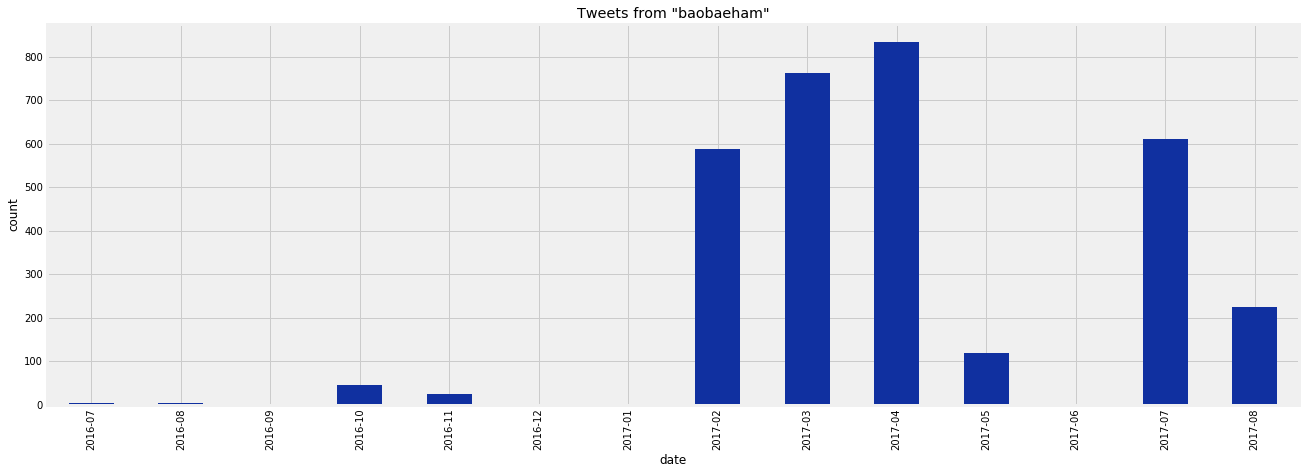

In [9]:
tweets_baobaeham['month'] = tweets_baobaeham['created_str'].dropna().dt.to_period('M')
months = tweets_baobaeham['month'].dropna().sort_values()
index = pd.PeriodIndex(start=months.iloc[0], end=months.iloc[-1])
grouped_baobaeham = tweets_baobaeham.groupby('month')['created_at'].count().reindex(index)
grouped_baobaeham.plot.bar(figsize=(20,7), linewidth=1, color="#1030A0")
plt.title('Tweets from "baobaeham"')
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'count')

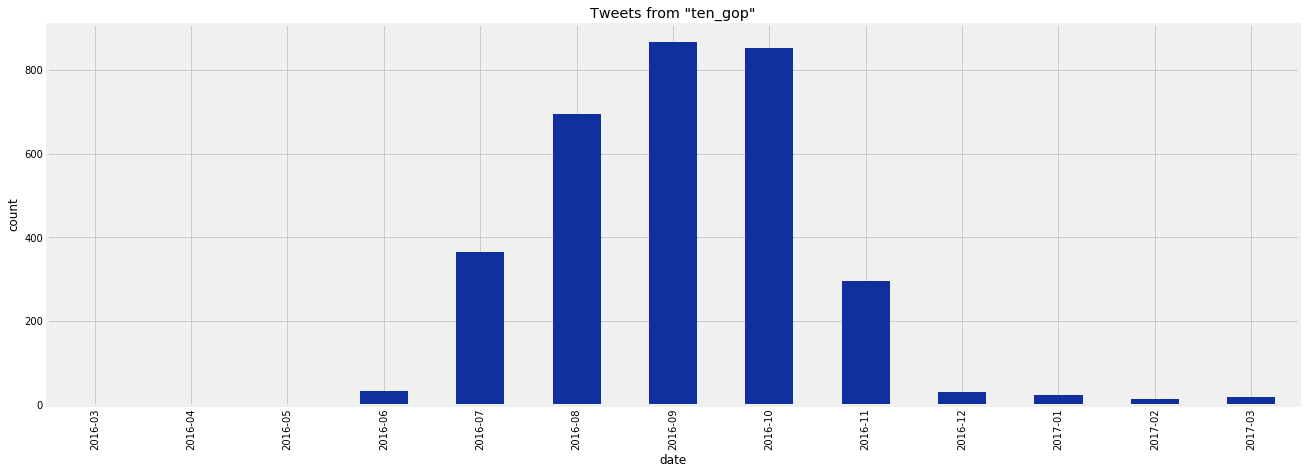

In [10]:
ten_gop['month'] = ten_gop['created_str'].dropna().dt.to_period('M')
months = ten_gop['month'].dropna().sort_values()
index = pd.PeriodIndex(start=months.iloc[0], end=months.iloc[-1])
grouped_ten_gop = ten_gop.groupby('month')['created_at'].count().reindex(index)
grouped_ten_gop.plot.bar(figsize=(20,7), linewidth=1, color="#1030A0")
plt.title('Tweets from "ten_gop"')
plt.xlabel('date')
plt.ylabel('count')

['2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08']

[0, 0, 0, 0, 0, 0, 0, 0, 5.0, 1.0, 0, 0, 0, 18.0, 41.0, 3250.0, 2054.0, 736.0, 0, 3083.0, 81.0, 0, 0, 0, 0, 0, 0]

[1.0, 0, 0, 1.0, 0, 0, 2.0, 0, 0, 0, 0, 7.0, 0, 13.0, 198.0, 227.0, 2120.0, 898.0, 1648.0, 1418.0, 119.0, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.0, 4.0, 2.0, 44.0, 25.0, 0, 0, 587.0, 762.0, 833.0, 118.0, 1.0, 611.0, 224.0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 33, 364, 694, 867, 852, 296, 30, 22, 14, 18, 0, 0, 0, 0, 0]


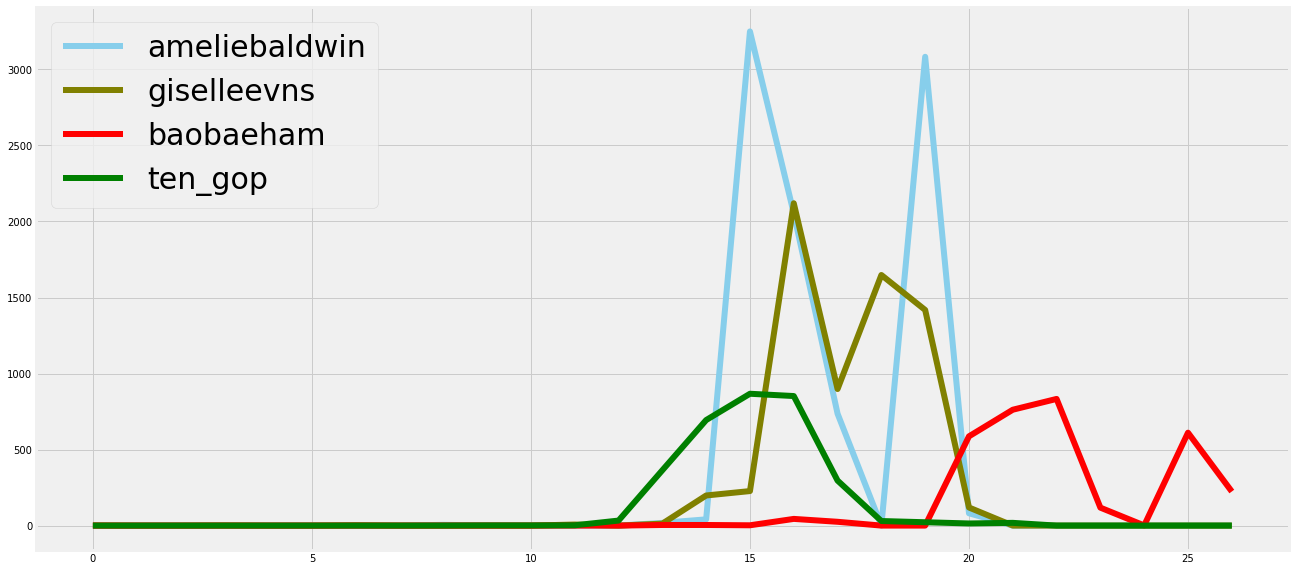

In [11]:
months = []

for month in grouped_giselleevns.index:
    months.append(str(month))
    
for month in grouped_baobaeham.index:
    if str(month) in months:
        pass
    else:
        months.append(str(month))
        
print(months)

monthsAm = []
monthsGis = []
monthsBao = []
monthsGop = []
        
for month in months:
    if month in grouped_ameliebaldwin.index:
        if math.isnan(grouped_ameliebaldwin[month]):
            monthsAm.append(0)
        else:
            monthsAm.append(grouped_ameliebaldwin[month])
    else:
        monthsAm.append(0)
        
for month in months:
    if month in grouped_giselleevns.index:
        if math.isnan(grouped_giselleevns[month]):
            monthsGis.append(0)
        else:
            monthsGis.append(grouped_giselleevns[month])
    else:
        monthsGis.append(0)
        
for month in months:
    if month in grouped_baobaeham.index:
        if math.isnan(grouped_baobaeham[month]):
            monthsBao.append(0)
        else:
            monthsBao.append(grouped_baobaeham[month])
    else:
        monthsBao.append(0)
        
for month in months:
    if month in grouped_ten_gop.index:
        if math.isnan(grouped_ten_gop[month]):
            monthsGop.append(0)
        else:
            monthsGop.append(grouped_ten_gop[month])
    else:
        monthsGop.append(0)
    
print()
print(monthsAm)
print()
print(monthsGis)
print()
print(monthsBao)
print()
print(monthsGop)

df=pd.DataFrame({'x': range(0,27), 'y1': monthsAm, 'y2': monthsGis, 'y3': monthsBao, 'y4': monthsGop})

plt.figure(figsize=(20, 10))

plt.plot('x', 'y1', data=df, marker='', color='skyblue', linewidth=6, label='ameliebaldwin')
plt.plot('x', 'y2', data=df, marker='', color='olive', linewidth=6, label='giselleevns')
plt.plot('x', 'y3', data=df, marker='', color='red', linewidth=6, label='baobaeham')
plt.plot('x', 'y4', data=df, marker='', color='green', linewidth=6, label='ten_gop')
plt.legend()
plt.legend(loc=2, prop={'size': 30})

In [12]:
for text in tweets_giselleevns['text'][:15]:    
    print(text)
    print()
    pass

@ModicaGiunta me, too!

#My2017BiggestHope to reach this level of pettiness https://t.co/YchECGXOTI

When I remember it's #Friyay https://t.co/yjBTsaFaR2

RT @RossMoorhouse: #ItsRiskyTo
Ignore the sign https://t.co/Eu6BgXi87q

@DcStarlord the game starts in 5 minutes

RT @DanaGeezus: Those #ChildrenThinkThat they don't actually have to think before they say anything become Donald Trump when they grow up

#InsteadOfWatchingTheBigGame I'm watching you https://t.co/6ftQ0PukN8

RT @SinCityChiGirl: I ate so much I clogged the toilet this morning.
 #ChristmasAftermath

RT @GiselleEvns: #MakeMeHateYouInOnePhrase millennials are the worst

#RuinADinnerInOnePhrase the food's not ready yet https://t.co/XISPPTBewJ

RT @skinny_savi: #IdRunForPresidentIf some people didn't think that women aren't capable of doing a man's job. Women can do anything just l…

eeeew https://t.co/NucZsKnEic

RT @ForkTongueRoad: #RuinADinnerInOnePhrase The Lannisters send their regards!

RT @ChrixMorgan: #ICelebrateTrump